## House Price Prediction uisng Multiple Linear Regressor - Machine Learning Model

### Akhil Paulson


In [428]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from scipy.stats import norm
from scipy import stats
from   statsmodels.formula.api import ols
import statsmodels.api         as     sm
from sklearn import datasets, linear_model, metrics

### Introduction

#### We have a dataset from King County which is located in the U.S. state of Washington, containing a whole information about features such as no.of bedrooms,no.of bathrooms,sqft_living,floors,sqft_living,sqft_basement,yr_built etc to predict the price of a house.

##### Importing the dataset

In [429]:
data = pd.read_csv("C:\\Users\\91703\\Downloads\\kc_house_train_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [430]:
data.shape                   # total no. of rows and columns in our dataset

(9761, 21)

Our dataset consists of '9761' observations and '20' variables

##### checking for duplicated observations

In [431]:
data[data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There are no duplicate observations found in the dataset

In [432]:
data.columns                 # displaying the variable column names

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Independent and Dependent Variables in the dataset

id = a number given to each house

date = date on which the price of the house is estimated

price =  the total price of the house

bedrooms = the number of bedrooms available in the house

bathrooms =  the number of bathrooms available in the house

sqft_living = squarefeet area of the total living area of the house

sqft_lot = squarefeet area of the entire plot in which the house is located

floors =  the number of floors of the house

waterfront =  an indication of whether the house is next to any lake or anyother waterbody

view =  an indication of whether the view of the house is available or not

condition =  an level indicating, how good the condition of the house is?

grade =  an level indicating the grade of the house according to the grading system in Kingston County

sqft_above = squarefeet area of the part of the house apart from from the basement

sqft_basement = squarefeet area  of the basement of the  house

yr_built = year in which the house is built

yr_renovated = year when the house was renovated

zipcode = zipcode of the area in which the house is located

lat = latitude co-ordinate of the area in which the house is located

lon = longititude co-ordinate of the area in which the house is located

sqft_living15 = squarefeet area of the living space of 15 nearest neighbours

sqft_lot15 = squarefeet area of the lot of 15 nearest neighbours

In [433]:
data = data.drop('id',axis=1) # we are dropping the column 'id' ,since it is not relevant and it doesnot make any influence on the price of the house

In [434]:
data.describe()  # decsribing every column of the dataset in terms of mean,standard deviation,minimum value,maximum value,
# quartile values at 25%, 50%, 75%

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [435]:
data1 = data.copy()                  # making a copy our dataset

In [436]:
data1 = data1.drop(['date'],axis=1)  # dropping the column 'date' from the dataset

In [437]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [438]:
X = data1.apply(lambda x: (x-np.mean(x)) / np.std(x)) # standardizing the data by subtracting mean and dividing by standard deviaton
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.161067,0.649683,1.140701,-0.136693,-0.247555,-0.913163,-0.092043,-0.314821,2.435701,-0.559360,-0.889401,1.393066,-0.198352,-0.212302,1.094152,-0.279914,-1.277300,-0.920081,-0.295086
1,1.809483,0.649683,3.078858,3.595187,2.101431,-0.913163,-0.092043,-0.314821,-0.638769,2.822962,2.508862,2.793911,1.032901,-0.212302,-0.465973,0.684938,1.496360,4.026906,3.360308
2,-0.197056,-1.432246,-1.443507,-0.999555,-0.223321,-0.913163,-0.092043,-0.314821,0.898466,-0.559360,-1.116750,0.014815,-0.984985,-0.212302,0.699421,0.926686,-0.555290,-0.963731,-0.257374
3,-0.613110,-0.391281,-1.443507,-0.708339,0.113553,0.026176,-0.092043,-0.314821,0.898466,-0.559360,-0.434704,-0.663013,-1.498007,-0.212302,-0.935890,1.395920,-0.104928,-0.308983,-0.004819
4,-0.376117,-0.391281,-0.474429,-0.773054,-0.134141,-0.913163,-0.092043,-0.314821,0.898466,-0.559360,-0.506498,-0.663013,0.212066,-0.212302,-0.071243,0.375444,1.210416,-0.905531,-0.098683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,-0.299753,-0.391281,-0.151403,-0.643624,-0.341437,2.844191,-0.092043,-0.314821,-0.638769,0.286220,-0.362910,-0.663013,1.477520,-0.212302,1.244525,0.070229,-0.526696,-0.861881,-0.437259
9757,0.178670,0.649683,0.494649,0.467311,-0.222764,0.965514,-0.092043,-0.314821,-0.638769,1.131801,0.869559,-0.663013,1.477520,-0.212302,-0.409583,-0.330545,0.338286,0.767715,-0.256507
9758,1.230167,0.649683,1.786754,1.535103,-0.194241,0.965514,-0.092043,-0.314821,-0.638769,1.131801,0.965285,1.393066,1.306513,-0.212302,1.094152,-0.045297,-1.313043,0.083866,-0.249832
9759,-0.370584,-1.432246,-1.766533,-1.150556,-0.336008,0.965514,-0.092043,-0.314821,-0.638769,-0.559360,-0.925298,-0.663013,1.306513,-0.212302,1.244525,0.244943,-0.605331,-1.414780,-0.407957


##### Correlation Matrix

In [439]:
corr= X.corr(method="pearson")        
corr.style.background_gradient()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.300777,0.527512,0.705044,0.094146,0.262955,0.274953,0.399711,0.044754,0.665594,0.611450,0.322369,0.051737,0.120439,-0.055619,0.299191,0.023718,0.584829,0.077960
bedrooms,0.300777,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149
bathrooms,0.527512,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722
sqft_living,0.705044,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545
sqft_lot,0.094146,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922
floors,0.262955,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269
waterfront,0.274953,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499
view,0.399711,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904
condition,0.044754,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253
grade,0.665594,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,0.756226,0.174216,0.447817,0.013053,-0.187340,0.107977,0.201114,0.717835,0.118618


#### Checking for the null values in the dataset

In [440]:
data.isnull().sum()  # checking for any missing values in the dataset

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We have found that there are no missing values present in the dataset

In [441]:
data.describe(include = ["object"])  

,date
count,9761
unique,357
top,20140820T000000
freq,64


In [442]:
data.describe(include = ["number"])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [443]:
data.info()   # displays datatype of each column whether it is int,float,object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9761 non-null   object 
 1   price          9761 non-null   float64
 2   bedrooms       9761 non-null   int64  
 3   bathrooms      9761 non-null   float64
 4   sqft_living    9761 non-null   int64  
 5   sqft_lot       9761 non-null   int64  
 6   floors         9761 non-null   float64
 7   waterfront     9761 non-null   int64  
 8   view           9761 non-null   int64  
 9   condition      9761 non-null   int64  
 10  grade          9761 non-null   int64  
 11  sqft_above     9761 non-null   int64  
 12  sqft_basement  9761 non-null   int64  
 13  yr_built       9761 non-null   int64  
 14  yr_renovated   9761 non-null   int64  
 15  zipcode        9761 non-null   int64  
 16  lat            9761 non-null   float64
 17  long           9761 non-null   float64
 18  sqft_liv

### Exploratory Data Analysis (EDA)

We use Exploratory data analysis (EDA)  to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers we need, making it easier for us to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

### Univariate Analysis

We use univariate analysis  to describe the data and find patterns that exist within it.


##### Target Variable Analysis

C:\Users\91703\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


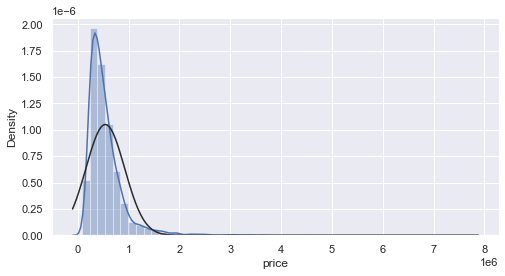

In [444]:
sns.distplot((data['price']), fit = norm)
plt.show()

From the above diagram,we can see that the data is positively skewed(right skewed).So,there is no homogeneity in the distribution of data along the variable 'price'.

In [445]:
dist_temp = pd.DataFrame(index = ['Skewness', 'Kurtosis'], data = {'Normal':[data['price'].skew(), data['price'].kurt()]})
print(dist_temp)

             Normal
Skewness   4.296023
Kurtosis  38.871048


Since ,the skewness value and kurtosis value are very high,we need to reduce the skewness by applying log trnasformation

C:\Users\91703\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

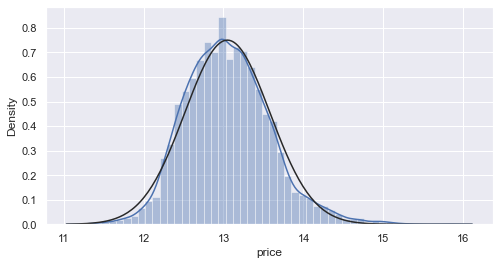

In [446]:
sns.distplot(np.log1p(data['price']), fit = norm)  # reducing the skewness of the distribution of 'price'

In [447]:
dist_temp = pd.DataFrame(index = ['Skewness', 'Kurtosis'], data = {'Normal':[np.log1p(data['price']).skew(), np.log1p(data['price']).kurt()]})
print(dist_temp)

            Normal
Skewness  0.459156
Kurtosis  0.744613


##### Predictor Variables Analysis

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


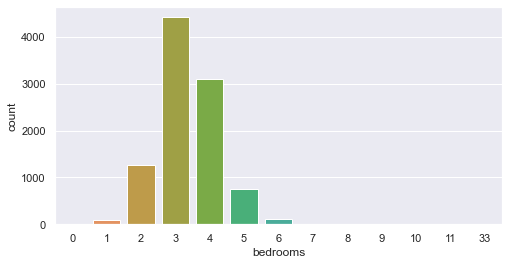

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


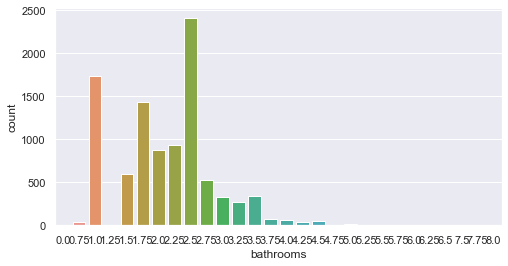

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


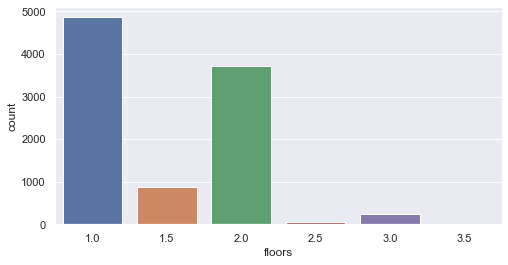

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


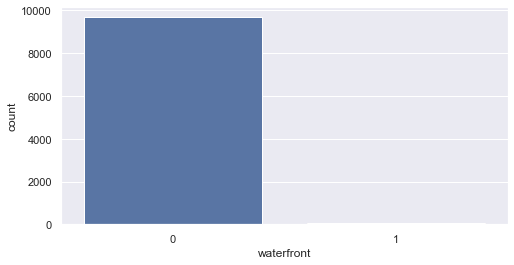

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


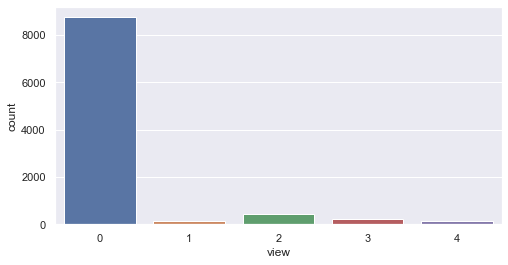

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


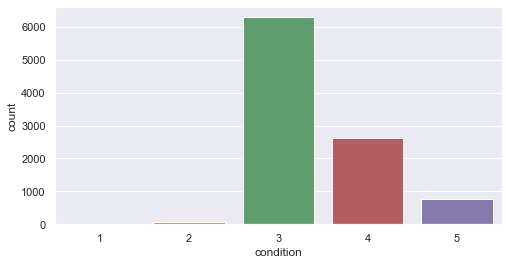

C:\Users\91703\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


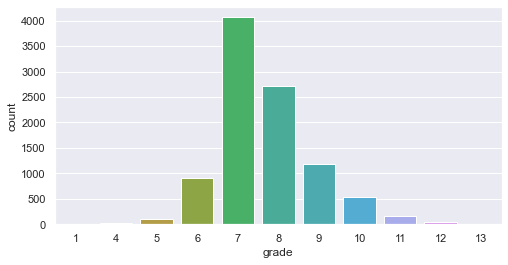

In [311]:
# using graphical univariate analysis of the discrete variables in the dataset
# we can use histograms or countlpots to show all the values of discrete variables and its distribution
cat = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']
for var in cat:
    plt.figure()
    plt.clf()
    sns.countplot(data[var])
    plt.show()
    

###### From the above graphs, following inferences are made :

###### 1. Houses having '3' bedrooms are large in number followed by houses having '4' bedrooms

###### 2 .

###### 3 .Single storeied houses are more in number, also two storied houses are in good number

###### 4 . All the houses are not having  'waterfront' in our dataset

###### 5 . A greater proportion of  houses are having view '0' 

###### 6 . Maximum number of houses are having condition '3', as per regulations in King County ,Washington

###### 6 . Maximum number of houses are having grade '7',followed by grade '8', as per regulations in King County ,Washington

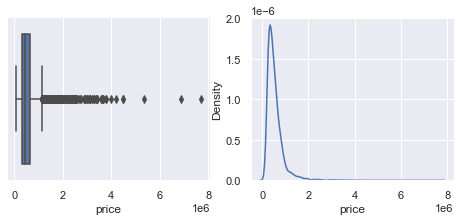

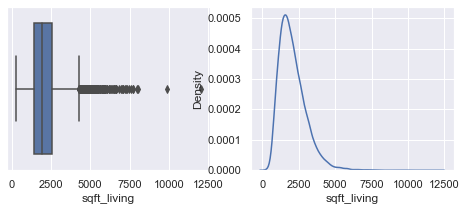

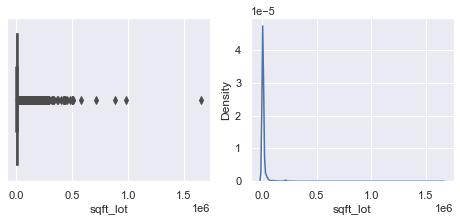

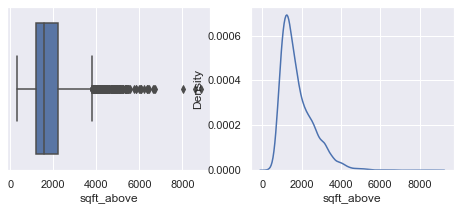

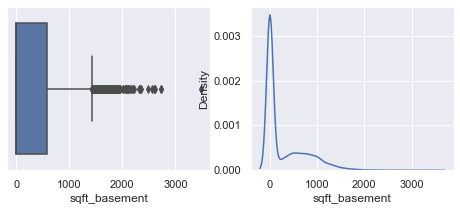

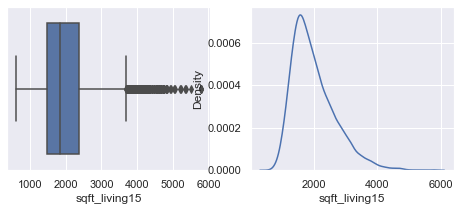

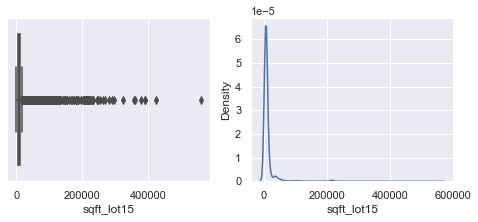

In [622]:
# using graphical univariate analysis for the continous variables in the dataset
# we can use boxplot or kdeplot to show all the values of the continous variables and its distribution
num = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']
for var in num:
    fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(8,3))
    sns.kdeplot(data=data1, x=var,ax=axs[1])
    sns.boxplot(data=data1, x=var,ax=axs[0])

The distribution of continous variables  'price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15' are positively skewed (or right skewed) .This may be  usually a result of a lower boundary in a data set (whereas data skewed to the left is a result of a higher boundary). So if the data set's lower bounds are extremely low relative to the rest of the data, this will cause the data to skew righ

### Multivariate Analysis

Multivariate data is used to display relationships between two or more columns of dataset. 

we can use scatter plot or boxplot for the multivariate analysis

##### Sqft living and Bathrooms

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


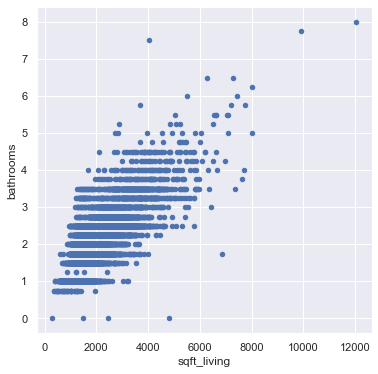

In [313]:
data.plot(x="sqft_living", y="bathrooms", figsize = (6,6), kind='scatter')
plt.show()

##### Sqft_living and Sqft_above

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


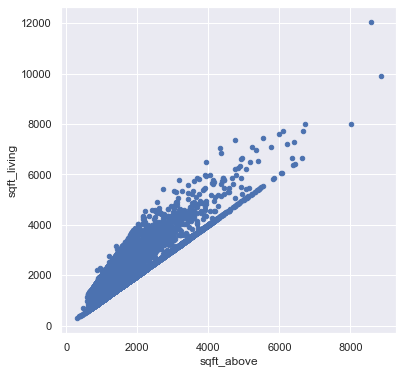

In [314]:
data.plot(x="sqft_above", y="sqft_living", figsize = (6,6), kind='scatter')
plt.show()

##### Sqft_living and Sqft_living15

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


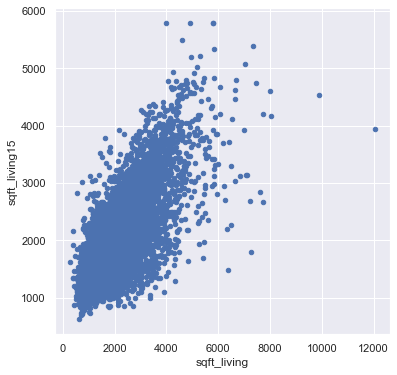

In [315]:
data.plot(x="sqft_living", y="sqft_living15", figsize = (6,6), kind='scatter')
plt.show()

##### Yr_built and grade

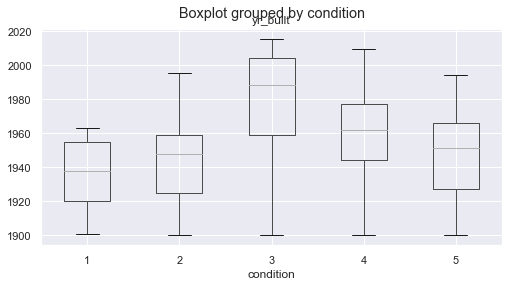

In [316]:
data.boxplot(column='yr_built', by='condition')
plt.show()

## Multiple Linear Regressor Model

Machine Learning Regressor Model tries to fit a regression line through a multidimensional space of data-points

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

Adjusted r-square is a modified form of r-square whose value increases if new predictors tend to improve model’s performance and decreases if new predictors do not improve performance as expected.

#### Accuracy Checks

Mean absolute error (MAE) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset

Mean Squared Error (MSE) measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss.It is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.  

Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data

Mean absolute percentage error (MAPE) is a measure of prediction accuracy of a forecasting method in statistics.MAPE is calculated by finding the absolute difference between the actual and predicted values, divided by the actual value. 

### Selection of Features based on Correlation with the Target variable

### Experiment 1 

In the first Experiment, we are using predictor we are using variables such as 'bathrooms', 'sqft_living', 'grade','sqft_above', 'sqft_living15' ,which has high correlation(>0.5) with the dependent variable 'price'

In [450]:
X = data[['bathrooms','sqft_living','grade','sqft_above','sqft_living15']] # predictors

In [451]:
y = data['price']    # Target Variable 'price'

##### Train - Validation - Test Split

In [452]:
#Train-Validation Split -> we are splitting our data set into train data an validation data on proportion of 4:1
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25)
len(X_valid),len(X_train)

(2441, 7320)

In [453]:
# we have '2441' observations as validation data and '7320' observations as train data

In [454]:
# creating a  linear regression model
reg = linear_model.LinearRegression()

In [455]:
# train the model using the train data sets
reg.fit(X_train, y_train)        # model fitting

LinearRegression()

In [456]:
y_pred = reg.predict(X_valid) # predicting the values of target variable 'price' by using the validation data
y_pred                        # predicted values

array([145295.99128363, 959082.3615645 , 881563.74372978, ...,
       304566.717412  , 536089.77303694, 987029.46752064])

##### R squared value

In [457]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.5447901566420497

##### Adjusted R square

In [458]:
adj_r1 = 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r1

0.5425091670867354

### ACCURACY CHECKS

In [459]:
# MAE -> Mean Absolute Percentage Error
np.mean(np.abs(y_valid - y_pred))

165845.39667976904

In [460]:
# MSE
np.mean((y_valid - y_pred)**2)

65268448949.89571

In [461]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

255476.9049246834

In [464]:
# MAPE
mape1 = np.log1p(np.mean(np.abs(y_valid- y_pred)/y)*100)
mape1

3.527006465189085

### Experiment 2 

In this experiment we are using same predictors used in Experiment-1 also applying log transformation to the variables such as 'price', 'sqft_living','sqft_above',  'sqft_living15'.

C:\Users\91703\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


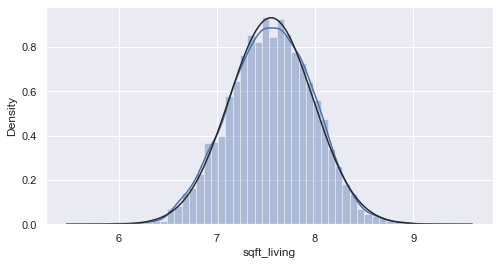

C:\Users\91703\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


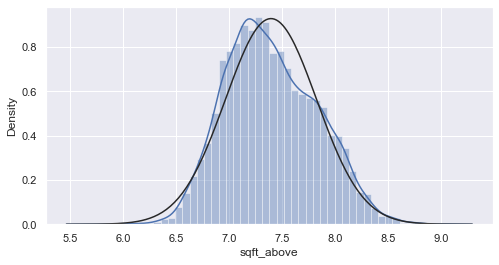

C:\Users\91703\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


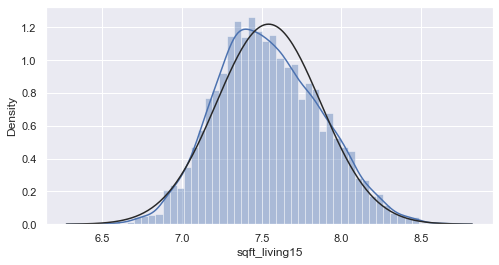

In [465]:
# reducing the skewness of the variables 'sqft_living','sqft_above','sqft_living15' by applying log transformation
num = ['sqft_living','sqft_above','sqft_living15']
for var in num:
    sns.distplot(np.log1p(data[var]), fit = norm)
    plt.show()

Here, we can see that the variables  'price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15' are now normally distributed

In [466]:
# applying log transformation to variables 'sqft_living','sqft_above','sqft_living15','price'.
num = ['sqft_living','sqft_above','sqft_living15','price']
for j in range(0,len(num)):
    data[num[j]] = np.log1p(data[num[j]])

In [468]:
X = data[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']] # predictors

In [469]:
y = data['price']   # Target

In [470]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25)
len(X_valid),len(X_train)

(2441, 7320)

In [471]:
# create linear regression object
reg = linear_model.LinearRegression()

In [472]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [473]:
y_pred = reg.predict(X_valid)
y_pred

array([13.56339461, 12.91802057, 13.06024581, ..., 13.23513934,
       12.91239354, 13.29798554])

In [474]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.5546915948218372

In [475]:
adj_r2 = 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2

0.5715133236411979

### ACCURACY CHECKS

In [476]:
# MAE
np.mean(np.abs(y_valid - y_pred))

0.2803762928529735

In [477]:
# MSE
np.mean((y_valid - y_pred)**2)

0.12217469307983592

In [478]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

0.34953496689149127

In [479]:
# MAPE
mape2 = np.mean(np.abs(y_valid- y_pred)/y)*100
mape2

2.153642485992988

### Experiment 3

Here ,we are adding predictor variables having correlation > 0.3 ,so  'bedrooms', 'sqft_basement' are added to the above predictors

In [493]:
X = data[['bedrooms','bathrooms', 'sqft_living','view', 'grade', 'sqft_above', 'sqft_basement','sqft_living15']]

In [494]:
y = data['price']

In [495]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

In [496]:
# create linear regression object
reg = linear_model.LinearRegression()

In [497]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [498]:
y_pred = reg.predict(X_valid)
y_pred

array([12.74377734, 13.36258017, 12.85299537, ..., 12.96776671,
       13.65977695, 13.37388133])

In [499]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.6017824669063973

In [500]:
adj_r3 = 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r3

0.5826163491215272

### ACCURACY CHECK

In [672]:
# MAE
np.mean(np.abs(y_valid - y_pred))

0.1464568400893399

In [502]:
# MSE
np.mean((y_valid - y_pred)**2)

0.11263416740969669

In [503]:
# MSE
np.mean((y_valid - y_pred)**2)

0.11263416740969669

In [504]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

0.335610141994691

In [505]:
# MAPE
mape3 = np.mean(np.abs(y_valid- y_pred)/y)*100
mape3

2.074088972433399

### Experiment 4 

In this experiment , we are doing feature engineering on predictor 'sqft_basement' and we are introducing new column 'age of the house' ,which is calculated by subtracting 'date' from 'yr_built'

##### In the column 'sqft_basement' , 60% of the observations have zero values.So we interpret it as an indication value means ,'1'   if value greater than zero and '0', if value is equal to zero

In [506]:
data['sqft_basement'] = data['sqft_basement'].apply(lambda x: 1 if x!=0 else 0 )

In [507]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141209T000000,13.311331,4,3.00,7.581210,5000,1.0,0,0,5,7,6.957497,1,1965,0,98136,47.5208,-122.393,7.215975,5000
1,20140512T000000,14.022526,4,4.50,8.598036,101930,1.0,0,0,3,11,8.266421,1,2001,0,98053,47.6561,-122.005,8.468213,101930
2,20140527T000000,13.056226,2,1.00,7.057037,6000,1.0,0,0,4,7,6.758095,1,1942,0,98115,47.6900,-122.292,7.193686,6000
3,20140528T000000,12.644331,3,1.00,7.266129,19901,1.5,0,0,4,7,7.266129,0,1927,0,98028,47.7558,-122.229,7.484930,12697
4,20141007T000000,12.899222,3,1.75,7.223296,9680,1.0,0,0,4,7,7.223296,0,1977,0,98074,47.6127,-122.045,7.223296,10208


In [508]:
data["date"]= pd.to_datetime(data["date"])    # converting the 'date' format into 'yyyy-mm-dd' format


In [509]:
data['year'] = pd.DatetimeIndex(data['date']).year # getting year from 'date'

In [510]:
data["age of the house"] = data['year']-data['yr_built']

In [511]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age of the house
0,2014-12-09,13.311331,4,3.00,7.581210,5000,1.0,0,0,5,...,1,1965,0,98136,47.5208,-122.393,7.215975,5000,2014,49
1,2014-05-12,14.022526,4,4.50,8.598036,101930,1.0,0,0,3,...,1,2001,0,98053,47.6561,-122.005,8.468213,101930,2014,13
2,2014-05-27,13.056226,2,1.00,7.057037,6000,1.0,0,0,4,...,1,1942,0,98115,47.6900,-122.292,7.193686,6000,2014,72
3,2014-05-28,12.644331,3,1.00,7.266129,19901,1.5,0,0,4,...,0,1927,0,98028,47.7558,-122.229,7.484930,12697,2014,87
4,2014-10-07,12.899222,3,1.75,7.223296,9680,1.0,0,0,4,...,0,1977,0,98074,47.6127,-122.045,7.223296,10208,2014,37


In [512]:
X = data[['bedrooms','bathrooms', 'sqft_living','view', 'grade', 'sqft_above', 'sqft_basement','sqft_living15','age of the house']]

In [513]:
y = data['price']

In [514]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

In [515]:
# create linear regression object
reg = linear_model.LinearRegression()

In [516]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [517]:
y_pred = reg.predict(X_valid)
y_pred

array([12.69265578, 13.54217276, 12.99938546, ..., 12.78876797,
       13.65267533, 13.36480057])

In [518]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.6600564277083214

In [519]:
adj_r4 = 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r4

0.6525779542917736

### ACCURACY CHECK

In [520]:
# MAE
np.mean(np.abs(y_valid - y_pred))

0.24616665574245566

In [521]:
# MSE
np.mean((y_valid - y_pred)**2)

0.09615162078348569

In [522]:
# RMSE
np.mean((y_valid - y_pred)**2)

0.09615162078348569

In [523]:
# MAPE
mape4 = np.mean(np.abs(y_valid- y_pred)/y)*100
mape4

1.897520649279973

### Experiment 5

In this experiment, we are setting dummies for the predictor 'zipcode'

In [524]:
data = pd.get_dummies(data, columns = ['zipcode'])  # getting dummies for 'zipcode'
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,2014-12-09,13.311331,4,3.00,7.581210,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,2014-05-12,14.022526,4,4.50,8.598036,101930,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,2014-05-27,13.056226,2,1.00,7.057037,6000,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-28,12.644331,3,1.00,7.266129,19901,1.5,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-10-07,12.899222,3,1.75,7.223296,9680,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [525]:
X = data[['bedrooms','bathrooms', 'sqft_living','view', 'grade', 'sqft_above', 'sqft_basement','sqft_living15','age of the house','zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']]

In [526]:
y = data['price']

In [527]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

In [528]:
# create linear regression object
reg = linear_model.LinearRegression()

In [529]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [530]:
y_pred = reg.predict(X_valid)
y_pred

array([12.3665812 , 13.70022047, 12.56513554, ..., 13.21336478,
       13.84736985, 13.15320683])

In [531]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.8715770799151275

In [532]:
adj_r5 = 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r5

0.8734570474510713

### ACCURACY CHECK

In [533]:
# MAE
np.mean(np.abs(y_valid - y_pred))

0.13966052730484182

In [534]:
# MSE
np.mean((y_valid - y_pred)**2)

0.036323887016500606

In [535]:
# RMSE
rmse5 = np.mean((y_valid - y_pred)**2)
rmse5

0.036323887016500606

In [536]:
# MAPE
mape5 = np.mean(np.abs(y_valid- y_pred)/y)*100
mape5

1.0756931806210905

### Inference about Adjusted R square

In [537]:
{'Experiment 1': adj_r1, 'Experiment 2': adj_r2, 'Experiment 3': adj_r3,'Experiment 4': adj_r4,'Experiment 5': adj_r5}

{'Experiment 1': 0.5425091670867354,
 'Experiment 2': 0.5715133236411979,
 'Experiment 3': 0.5826163491215272,
 'Experiment 4': 0.6525779542917736,
 'Experiment 5': 0.8734570474510713}

### Inference about MAE (Mean Absolute Error)

In [539]:
{'Experiment 1': mape1, 'Experiment 2': mape2, 'Experiment 3': mape3,'Experiment 4': mape4,'Experiment 5': mape5}

{'Experiment 1': 3.527006465189085,
 'Experiment 2': 2.153642485992988,
 'Experiment 3': 2.074088972433399,
 'Experiment 4': 1.897520649279973,
 'Experiment 5': 1.0756931806210905}

By looking into the 'adjusted R square' value and 'MAE' value of all the experiments,we can decide that sets of predictors in Experiment - 5 or model used is more predictive compared to other models 

### Estimation of Coefficients using OLS Method

In [629]:
import statsmodels.api as sm
import pandas as pd
# adding the constant term
x = sm.add_constant(X)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     858.4
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:42:18   Log-Likelihood:                 2465.3
No. Observations:                9761   AIC:                            -4771.
Df Residuals:                    9681   BIC:                            -4196.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.0524      0.211  

C:\Users\91703\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='price'>

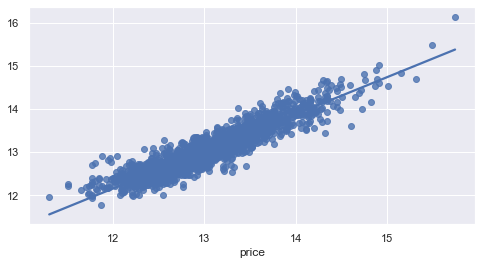

In [630]:
# importing libraries
import seaborn as sb
# use regplot
sb.regplot(x = y_valid,
            y = y_pred, 
            ci = None,
            data = data)

<AxesSubplot:xlabel='price', ylabel='price'>

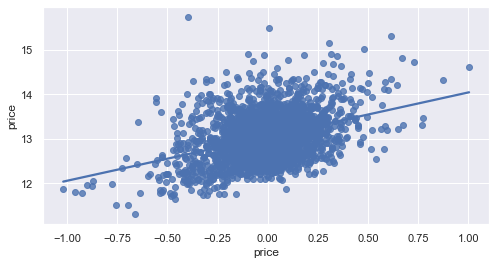

In [631]:
# importing libraries
import seaborn as sb
# use regplot
sb.regplot(y = y_valid,
            x = y_valid - y_pred, 
            ci = None,
            data = data)

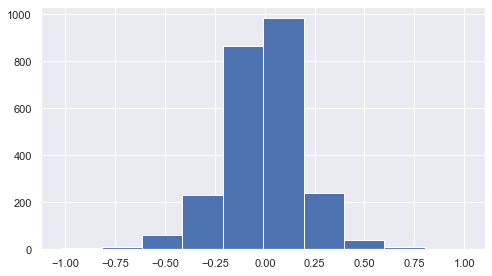

In [632]:
fig, axs = plt.subplots(1, 1,
                        figsize =(7, 4),
                        tight_layout = True)
 
axs.hist(y_valid-y_pred, bins = 10)
plt.show()

C:\Users\91703\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


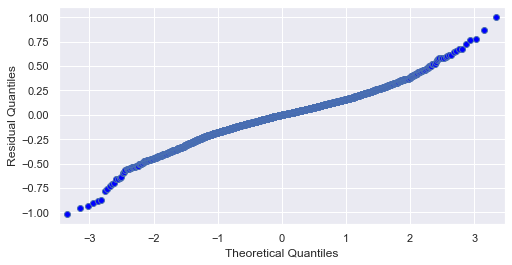

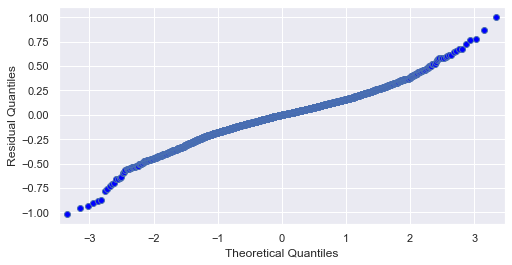

In [633]:
import statsmodels.api as sm
sm.qqplot(y_valid - y_pred, ylabel = "Residual Quantiles" )

### Variance Inflation Factor

In [545]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,1.758880,1.326228
1,bathrooms,3.151095,1.775132
2,sqft_living,19.612476,4.428597
3,view,1.277610,1.130314
4,grade,3.601003,1.897631
...,...,...,...
74,zipcode_98177,18.757650,4.331010
75,zipcode_98178,16.445070,4.055252
76,zipcode_98188,9.003157,3.000526
77,zipcode_98198,19.034256,4.362827


There is a presence of Multicollinearity in our set of predictors,as predictor 'sqft_living' and the dummies of 'zipcode' are having VIF > 5

 So, we are trying different methods to remove the Multicollinearity,by removing each predictor at a time and checking the VIF by keeping dummies of 'zipcode'aside now.

In [636]:
X1 = X[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'age of the house']]

In [637]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,21.060271,4.589147
1,bathrooms,22.855203,4.780712
2,sqft_living,5832.321281,76.369636
3,view,1.243063,1.114927
4,grade,109.935383,10.485008
5,sqft_above,5157.405116,71.815076
6,sqft_basement,7.343140,2.709823
7,sqft_living15,1014.640983,31.853430
8,age of the house,4.977121,2.230946


In [638]:
X2 = X[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15']]

In [639]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns

vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,21.000771,4.582660
1,bathrooms,18.820970,4.338314
2,sqft_living,5794.303967,76.120326
3,view,1.211573,1.100715
4,grade,103.630279,10.179896
5,sqft_above,5155.277193,71.800259
6,sqft_basement,7.280036,2.698154
7,sqft_living15,1013.491511,31.835381


In [640]:
X3 = X[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'age of the house']]

In [641]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns

vif_data["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,20.076449,4.480675
1,bathrooms,20.812504,4.562072
2,sqft_living,5241.721294,72.399733
3,view,1.240656,1.113847
4,grade,109.704612,10.473997
5,sqft_above,5070.892405,71.210199
6,sqft_basement,7.343137,2.709822
7,age of the house,4.971483,2.229682


In [642]:
X4 = X[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_living15', 'age of the house']]

In [643]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X4.columns

vif_data["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,20.954888,4.577651
1,bathrooms,22.554722,4.749181
2,sqft_living,2013.891608,44.876404
3,view,1.242574,1.114708
4,grade,109.096490,10.444927
5,sqft_above,1386.390386,37.234264
6,sqft_living15,1014.640682,31.853425
7,age of the house,4.934350,2.221340


In [644]:
X5 = X[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_basement', 'sqft_living15', 'age of the house']]

In [645]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X5.columns

vif_data["VIF"] = [variance_inflation_factor(X5.values, i)
                          for i in range(len(X5.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,20.903567,4.572042
1,bathrooms,22.775150,4.772332
2,sqft_living,1242.260794,35.245720
3,view,1.237825,1.112576
4,grade,107.475632,10.367045
5,sqft_basement,1.973950,1.404973
6,sqft_living15,997.620924,31.585138
7,age of the house,4.975068,2.230486


In [646]:
X6 = X[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'age of the house']]

In [647]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X6.columns

vif_data["VIF"] = [variance_inflation_factor(X6.values, i)
                          for i in range(len(X6.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,20.965088,4.578765
1,bathrooms,20.870659,4.568442
2,sqft_living,5825.486840,76.324877
3,view,1.185589,1.088848
4,sqft_above,5042.010666,71.007117
5,sqft_basement,7.287106,2.699464
6,sqft_living15,1012.511092,31.819979
7,age of the house,4.691669,2.166026


In [648]:
X7 = X[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'age of the house']]

In [649]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X7.columns

vif_data["VIF"] = [variance_inflation_factor(X7.values, i)
                          for i in range(len(X7.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,21.043458,4.587315
1,bathrooms,22.553101,4.749010
2,sqft_living,5831.903137,76.366898
3,grade,104.852471,10.239750
4,sqft_above,5135.675127,71.663625
5,sqft_basement,7.340250,2.709290
6,sqft_living15,1012.676051,31.822571
7,age of the house,4.851039,2.202507


In [650]:
X8 = X[['bedrooms', 'bathrooms', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', 'age of the house']]

In [651]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X8.columns

vif_data["VIF"] = [variance_inflation_factor(X8.values, i)
                          for i in range(len(X8.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,20.009297,4.473175
1,bathrooms,22.708762,4.765371
2,view,1.242974,1.114887
3,grade,109.806559,10.478862
4,sqft_above,1098.506386,33.143723
5,sqft_basement,2.535575,1.592349
6,sqft_living15,911.895109,30.197601
7,age of the house,4.944678,2.223663


In [652]:
X9 = X[['bedrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', 'age of the house']]

In [653]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X9.columns

vif_data["VIF"] = [variance_inflation_factor(X9.values, i)
                          for i in range(len(X9.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,19.607203,4.428002
1,sqft_living,5794.951556,76.124579
2,view,1.226632,1.107534
3,grade,100.389565,10.019459
4,sqft_above,5139.340674,71.689195
5,sqft_basement,7.246598,2.691951
6,sqft_living15,923.956747,30.396657
7,age of the house,4.098596,2.024499


In [654]:
X10 = X[[ 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'age of the house']]

In [655]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X10.columns

vif_data["VIF"] = [variance_inflation_factor(X10.values, i)
                          for i in range(len(X10.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bathrooms,21.278293,4.612840
1,sqft_living,5541.270187,74.439708
2,view,1.242071,1.114482
3,grade,109.438527,10.461287
4,sqft_above,5119.030389,71.547400
5,sqft_basement,7.306396,2.703035
6,sqft_living15,967.242482,31.100522
7,age of the house,4.963060,2.227793


So, in step 8 we got comparitively lesser value of VIF ,when we remove the column 'sqft_lving'

In [673]:
X_final = X
X_final.head()         # final set of predictors

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15,age of the house,zipcode_98001,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,new
0,4,3.00,7.581210,0,7,6.957497,1,7.215975,49,0,...,0,0,0,0,0,0,0,0,0,351.435890
1,4,4.50,8.598036,0,11,8.266421,1,8.468213,13,0,...,0,0,0,0,0,0,0,0,0,770.019996
2,2,1.00,7.057037,0,7,6.758095,1,7.193686,72,0,...,0,0,0,0,0,0,0,0,0,340.309260
3,3,1.00,7.266129,0,7,7.266129,0,7.484930,87,0,...,0,0,0,0,0,0,0,0,0,380.705271
4,3,1.75,7.223296,0,7,7.223296,0,7.223296,37,0,...,0,0,0,0,0,0,0,0,0,365.232003


###### Here, we are adding a new column which is the product of columns  'sqft_above',' grade',' sqft_living15'

In [658]:
X_final['new'] = X_final['sqft_above']*(X_final['grade'])*X_final['sqft_living15']


C:\Users\91703\AppData\Local\Temp/ipykernel_25636/2734437796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final['new'] = X_final['sqft_above']*(X_final['grade'])*X_final['sqft_living15']


In [659]:
X_final = X.drop(['grade','sqft_above','sqft_living15','sqft_living'],axis=1)
X_final.head()

,bedrooms,bathrooms,view,sqft_basement,age of the house,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,new
0,4,3.00,0,1,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,351.435890
1,4,4.50,0,1,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,770.019996
2,2,1.00,0,1,72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,340.309260
3,3,1.00,0,0,87,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380.705271
4,3,1.75,0,0,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,365.232003


In [661]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_final.columns

vif_data["VIF"] = [variance_inflation_factor(X_final.values, i)
                          for i in range(len(X_final.columns))]
vif_data["GVIF"] = vif_data["VIF"]**(1/2)
vif_data

,feature,VIF,GVIF
0,bedrooms,1.484216,1.218284
1,bathrooms,2.775252,1.665909
2,view,1.257474,1.121371
3,sqft_basement,1.292271,1.136781
4,age of the house,1.990659,1.410907
...,...,...,...
71,zipcode_98178,1.469023,1.212032
72,zipcode_98188,1.246051,1.116266
73,zipcode_98198,1.506392,1.227352
74,zipcode_98199,1.817866,1.348282


##### Here, the multicollinearity present in our dataset is removed by introducing a new column and grade.We also removed the predictor 'sqft_living' since it has high value of VIF

------ Fitting a Linear Regressor model on the new set of predictors

In [662]:
X_train, X_valid, y_train, y_valid = train_test_split(X_final, y, test_size=0.25,
                                                    random_state=1)
len(X_train),len(X_valid)

(7320, 2441)

In [663]:
# create linear regression object
reg = linear_model.LinearRegression()

In [664]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [665]:
y_pred = reg.predict(X_valid)
y_pred

array([12.41363439, 13.73185855, 12.48707324, ..., 13.22865811,
       13.71843021, 13.22365311])

In [666]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_pred)

0.859821798515955

In [667]:
adj_r6 = 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r6

0.860794643655159

In [668]:
import statsmodels.api as sm
import pandas as pd
# adding the constant term
x = sm.add_constant(X_)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     806.7
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:55:49   Log-Likelihood:                 1979.8
No. Observations:                9761   AIC:                            -3808.
Df Residuals:                    9685   BIC:                            -3261.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.3233      0.014  

C:\Users\91703\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='price'>

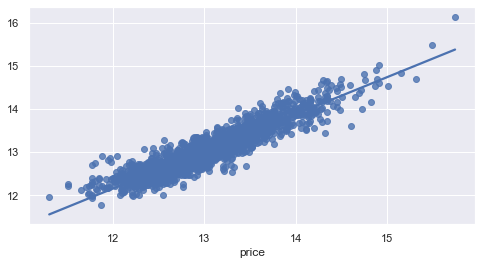

In [669]:
# importing libraries
import seaborn as sb
# use regplot
sb.regplot(x = y_valid,
            y = y_pred, 
            ci = None,
            data = X_)

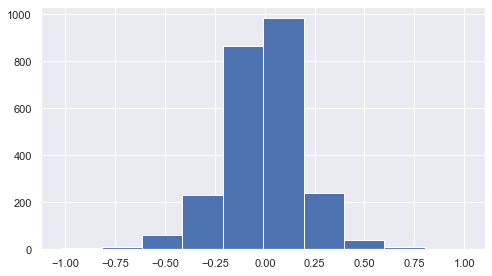

In [670]:
fig, axs = plt.subplots(1, 1,
                        figsize =(7, 4),
                        tight_layout = True)
 
axs.hist(y_valid-y_pred, bins = 10)
plt.show()

C:\Users\91703\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


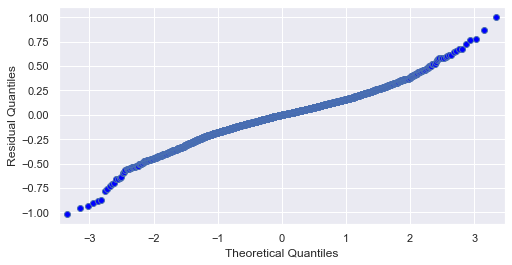

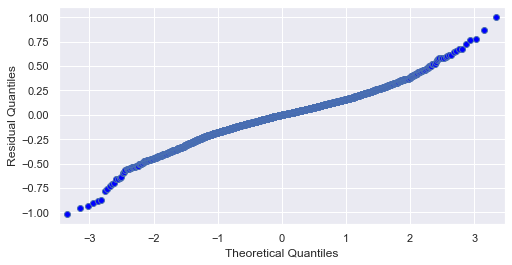

In [671]:
import statsmodels.api as sm
sm.qqplot(y_valid - y_pred, ylabel = "Residual Quantiles" )